# LEVERAGING MACHINE LEARNING METHODS FOR IMPROVED EARLY CANCER DETECTION IN SCREENING

## INTRODUCTION
The outlined project is dedicated to enhancing cancer screening efforts in Kenya through targeted interventions and leveraging data-driven strategies. By addressing barriers to early detection and management, this initiative aims to mitigate the burden of cancer by promoting screening, facilitating early detection, and improving treatment outcomes.

## BUSINESS UNDERSTANDING

### OVERVIEW
Cancer screening in Kenya faces multifaceted challenges, including limited awareness, inadequate healthcare infrastructure, and financial constraints. These obstacles contribute to low screening rates, hindering the early detection and management of cancer, which is crucial for improving treatment outcomes and reducing mortality rates.
The urgency to ramp up early detection measures is underscored by the alarming statistics of cancer's impact on public health in Kenya. As the third leading cause of death in the country, cancer imposes a heavy burden on individuals, families, and the healthcare system. Late diagnosis exacerbates this burden, leading to high mortality rates and diminished quality of life for patients.

## Business Objectives

+ Early Detection: Detect cancer at its earliest stages, using behavioral health factors, to improve treatment outcomes and reduce mortality rates.

+ Reduce cancer-related morbidity and mortality using predictive modelling

+ Effectiveness: Improve effectiveness of cancer screening through innovative methods and strategic partnerships.

+ Public Health Impact: Contribute to reducing the burden of cancer on public health by implementing evidence-based screening programs.

## Data Understanding

The project will involve collecting the Behavioral Risk Factor Surveillance System (BRFSS) data for the year 2020, which is compiled and maintained by the Centers for Disease Control and Prevention (CDC) in the United States. BRFSS is a nationwide survey that collects data on health-related behaviors, chronic health conditions, and use of preventive services among adults in the United States.
The raw data will be obtained directly from the CDC, which regularly releases BRFSS datasets to the public for research and analysis purposes.

This dataset has a total of 401,959 records with 50 features(variables). The features used in the analysis include but not limited to age, gender, general health, physical health, mental health, smoking status, alcohol consumption, physical activity, weight, height and history of cancer screening.

The features (variables) of the data are described in the codebook in this repository 

# >>>>>>>

In [157]:
#Import relevant libraries
#Regular libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Set the default colormap to 'coolwarm'
plt.set_cmap('coolwarm')
plt.style.use('ggplot')

#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as skl_Pipeline
from imblearn.pipeline import Pipeline as imb_Pipeline

<Figure size 640x480 with 0 Axes>

In [151]:
# Import data
data = pd.read_csv('Data/2020-brfss-survey-responses.csv')

In [152]:
# Check data structure
data.head()

,FIPS,ST,X_URBSTAT,X_AGEG5YR,DISPCODE,NUMADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,...,AVEDRNK3,DRNK3GE5,SEATBELT,HADMAM,PSATEST1,COLNSCPY,HIVTST7,HIVRISK5,X_LLCPWT,X_AAWEIGHT
0,1,AL,1.0,11,1100,1.0,2,3.0,88.0,88.0,...,88.0,4.0,1.0,1.0,NaN,1.0,1.0,2.0,351.425067,203.906248
1,1,AL,1.0,12,1100,3.0,1,5.0,10.0,88.0,...,NaN,NaN,1.0,NaN,2.0,1.0,2.0,2.0,717.647873,383.539091
2,1,AL,1.0,13,1200,1.0,2,3.0,5.0,88.0,...,NaN,NaN,1.0,1.0,NaN,1.0,2.0,NaN,2207.021300,1538.325330
3,1,AL,1.0,10,1100,2.0,2,4.0,3.0,3.0,...,NaN,NaN,1.0,1.0,NaN,1.0,2.0,2.0,785.062265,462.564229
4,1,AL,1.0,13,1100,1.0,2,2.0,88.0,88.0,...,NaN,NaN,1.0,1.0,NaN,1.0,2.0,2.0,327.589761,228.334737


In [153]:
# More information on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Data columns (total 51 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   FIPS        401958 non-null  int64  
 1   ST          394831 non-null  object 
 2   X_URBSTAT   394831 non-null  float64
 3   X_AGEG5YR   401958 non-null  int64  
 4   DISPCODE    401958 non-null  int64  
 5   NUMADULT    124742 non-null  float64
 6   SEXVAR      401958 non-null  int64  
 7   GENHLTH     401950 non-null  float64
 8   PHYSHLTH    401953 non-null  float64
 9   MENTHLTH    401953 non-null  float64
 10  HLTHPLN1    401955 non-null  float64
 11  EXERANY2    401955 non-null  float64
 12  SLEPTIM1    401955 non-null  float64
 13  CVDINFR4    401952 non-null  float64
 14  CVDCRHD4    401955 non-null  float64
 15  CVDSTRK3    401955 non-null  float64
 16  ASTHMA3     401955 non-null  float64
 17  CHCSCNCR    401955 non-null  float64
 18  CHCOCNCR    401955 non-null  float64
 19  CH

In [154]:
# Data description
data.describe()

,FIPS,X_URBSTAT,X_AGEG5YR,DISPCODE,NUMADULT,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,HLTHPLN1,...,AVEDRNK3,DRNK3GE5,SEATBELT,HADMAM,PSATEST1,COLNSCPY,HIVTST7,HIVRISK5,X_LLCPWT,X_AAWEIGHT
count,401958.000000,394831.000000,401958.000000,401958.000000,124742.000000,401958.000000,401950.000000,401953.000000,401953.000000,401955.000000,...,190859.000000,190332.000000,376447.000000,203520.000000,125915.000000,258555.000000,367921.000000,366026.000000,401958.000000,394831.000000
mean,30.010359,1.149692,7.667363,1117.747874,1.752120,1.542385,2.452947,66.143629,61.453740,1.119809,...,4.077251,66.371015,1.258557,1.255921,1.824382,1.339429,1.941884,1.996350,647.849949,737.624631
std,15.773473,0.356770,3.660209,38.207382,0.816289,0.498201,1.085778,34.827121,36.951143,0.562472,...,12.342536,36.537959,0.844678,0.617191,1.390534,0.715403,1.281266,0.531705,1418.402069,1767.824851
min,1.000000,1.000000,1.000000,1100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.958278,0.000000
25%,18.000000,1.000000,5.000000,1100.000000,1.000000,1.000000,2.000000,30.000000,15.000000,1.000000,...,1.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,113.404274,84.209716
50%,29.000000,1.000000,8.000000,1100.000000,2.000000,2.000000,2.000000,88.000000,88.000000,1.000000,...,2.000000,88.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,282.287914,254.071714
75%,41.000000,1.000000,11.000000,1100.000000,2.000000,2.000000,3.000000,88.000000,88.000000,1.000000,...,3.000000,88.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,663.936641,709.870264
max,72.000000,2.000000,14.000000,1200.000000,18.000000,2.000000,9.000000,99.000000,99.000000,9.000000,...,99.000000,99.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,83193.322100,101760.155381


# Pre-processing 

In [155]:
#Check percentage of missing values in each columns
missing_percentage = {col:(data[col].isna().sum()/len(data[col]))*100 for col in data.columns}
# Create DataFrame from the first dictionary
df = pd.DataFrame([missing_percentage]).T
df.columns = ['%_missing']

df = df.sort_values(by= '%_missing', ascending= False)
df

,%_missing
DIABAGE3,87.039939
STOPSMK2,86.958090
PREGNANT,81.194553
NUMADULT,68.966409
PSATEST1,68.674588
SMOKDAY2,61.032247
DRNK3GE5,52.648784
AVEDRNK3,52.517676
HADMAM,49.367844
COLNSCPY,35.676115


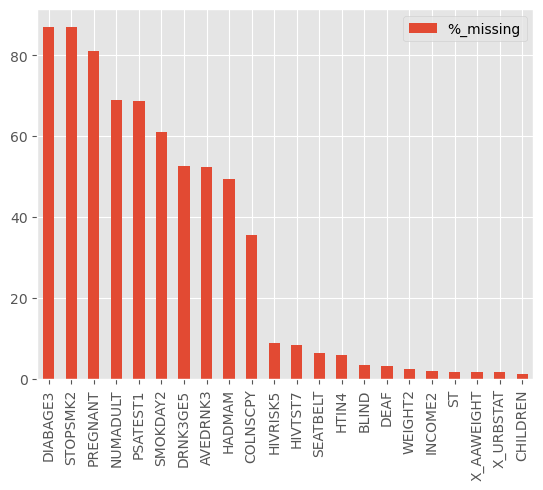

In [158]:
# Quick plot for columns with more than 1% missing data
df[df['%_missing'] > 1].plot(kind='bar');

## Feature Engineering

### 1. Perform some feature engineering to save on insights from 'high-missing-data' columns

In [159]:
# Feature engineering using columns with high missing data
# Combine 'HadMammogram', 'HadColoscopy', & 'HadPSA-test' into a column called 'HadExam[Medical]'
data.loc[:, 'HADEXAM'] = np.nan  # Default uncertain value [missing]
data.loc[(data['PSATEST1'] == 1) | 
         (data['HADMAM'] == 1) | 
         (data['COLNSCPY'] == 1), 'HADEXAM'] = 1 # Has taken an medical exam

data.loc[(data['PSATEST1'] == 2) & 
         (data['HADMAM'] == 2) & 
         (data['COLNSCPY'] == 2), 'HADEXAM'] = 2 # Has not taken a medical exam

data.loc[data['PSATEST1'].isin([7, 9]) | 
         data['HADMAM'].isin([7, 9]) | 
         data['COLNSCPY'].isin([7, 9]), 'HADEXAM'] = 7  # Don't know/Not Sure or Refused

In [160]:
# Feature engineering using columns with high missing data
# Combine all 'Smokes' and 'Drinks' features
data.loc[:, 'SMOKDRINK'] = np.nan  # Default uncertain value [missing]
# Smokes or drinks
data.loc[(data['SMOKDAY2'].isin([1, 2])) | 
         (data['STOPSMK2'] == 1) | 
         (data['AVEDRNK3'].between(1, 76)) | 
         (data['DRNK3GE5'].between(1, 76)), 'SMOKDRINK'] = 1

# Doesn't smoke or drink
data.loc[(data['SMOKDAY2'] == 3) & 
         (data['AVEDRNK3'] == 88) & 
         (data['DRNK3GE5'] == 88), 'SMOKDRINK'] = 2

# Not sure or refused to answer
data.loc[(data['SMOKDAY2'].isin([7, 9])) | 
         (data['STOPSMK2'].isin([7, 9])) | 
         (data['AVEDRNK3'].isin([77, 99])) | 
         (data['DRNK3GE5'].isin([77, 99])), 'SMOKDRINK'] = 7

In [161]:
#Check percentage of missing values in each columns
missing_percentage = {col:(data[col].isna().sum()/len(data[col]))*100 for col in data.columns}
# Create DataFrame from the first dictionary
df = pd.DataFrame([missing_percentage]).T
df.columns = ['%_missing']

df = df.sort_values(by= '%_missing', ascending= False)
df

,%_missing
DIABAGE3,87.039939
STOPSMK2,86.958090
PREGNANT,81.194553
NUMADULT,68.966409
PSATEST1,68.674588
SMOKDAY2,61.032247
DRNK3GE5,52.648784
AVEDRNK3,52.517676
HADMAM,49.367844
SMOKDRINK,46.275979


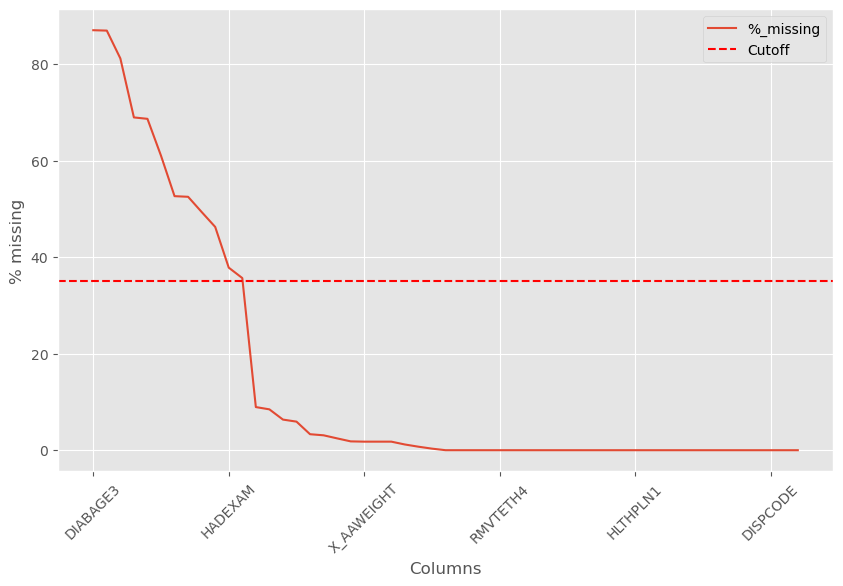

In [168]:
#Criteria for dropping columns with with high % missing values [Cut-off]
df.plot(xlabel='Columns',
        ylabel= '% missing',
        figsize= (10,6))
# Plot a horizontal line at y=35
plt.axhline(y=35, color='r', linestyle='--', label='Cutoff')
plt.xticks(rotation=45)
plt.legend();

In [169]:
# Drop columns with high missing values that were used in above feature engineering
drop_columns = ['DIABAGE3', 'STOPSMK2', 'PREGNANT', 'NUMADULT', 'PSATEST1', 'SMOKDAY2', 
                 'DRNK3GE5', 'AVEDRNK3', 'HADMAM', 'COLNSCPY']

# Drop the columns
data.drop(columns= drop_columns, inplace= True)
data.shape

(401958, 43)

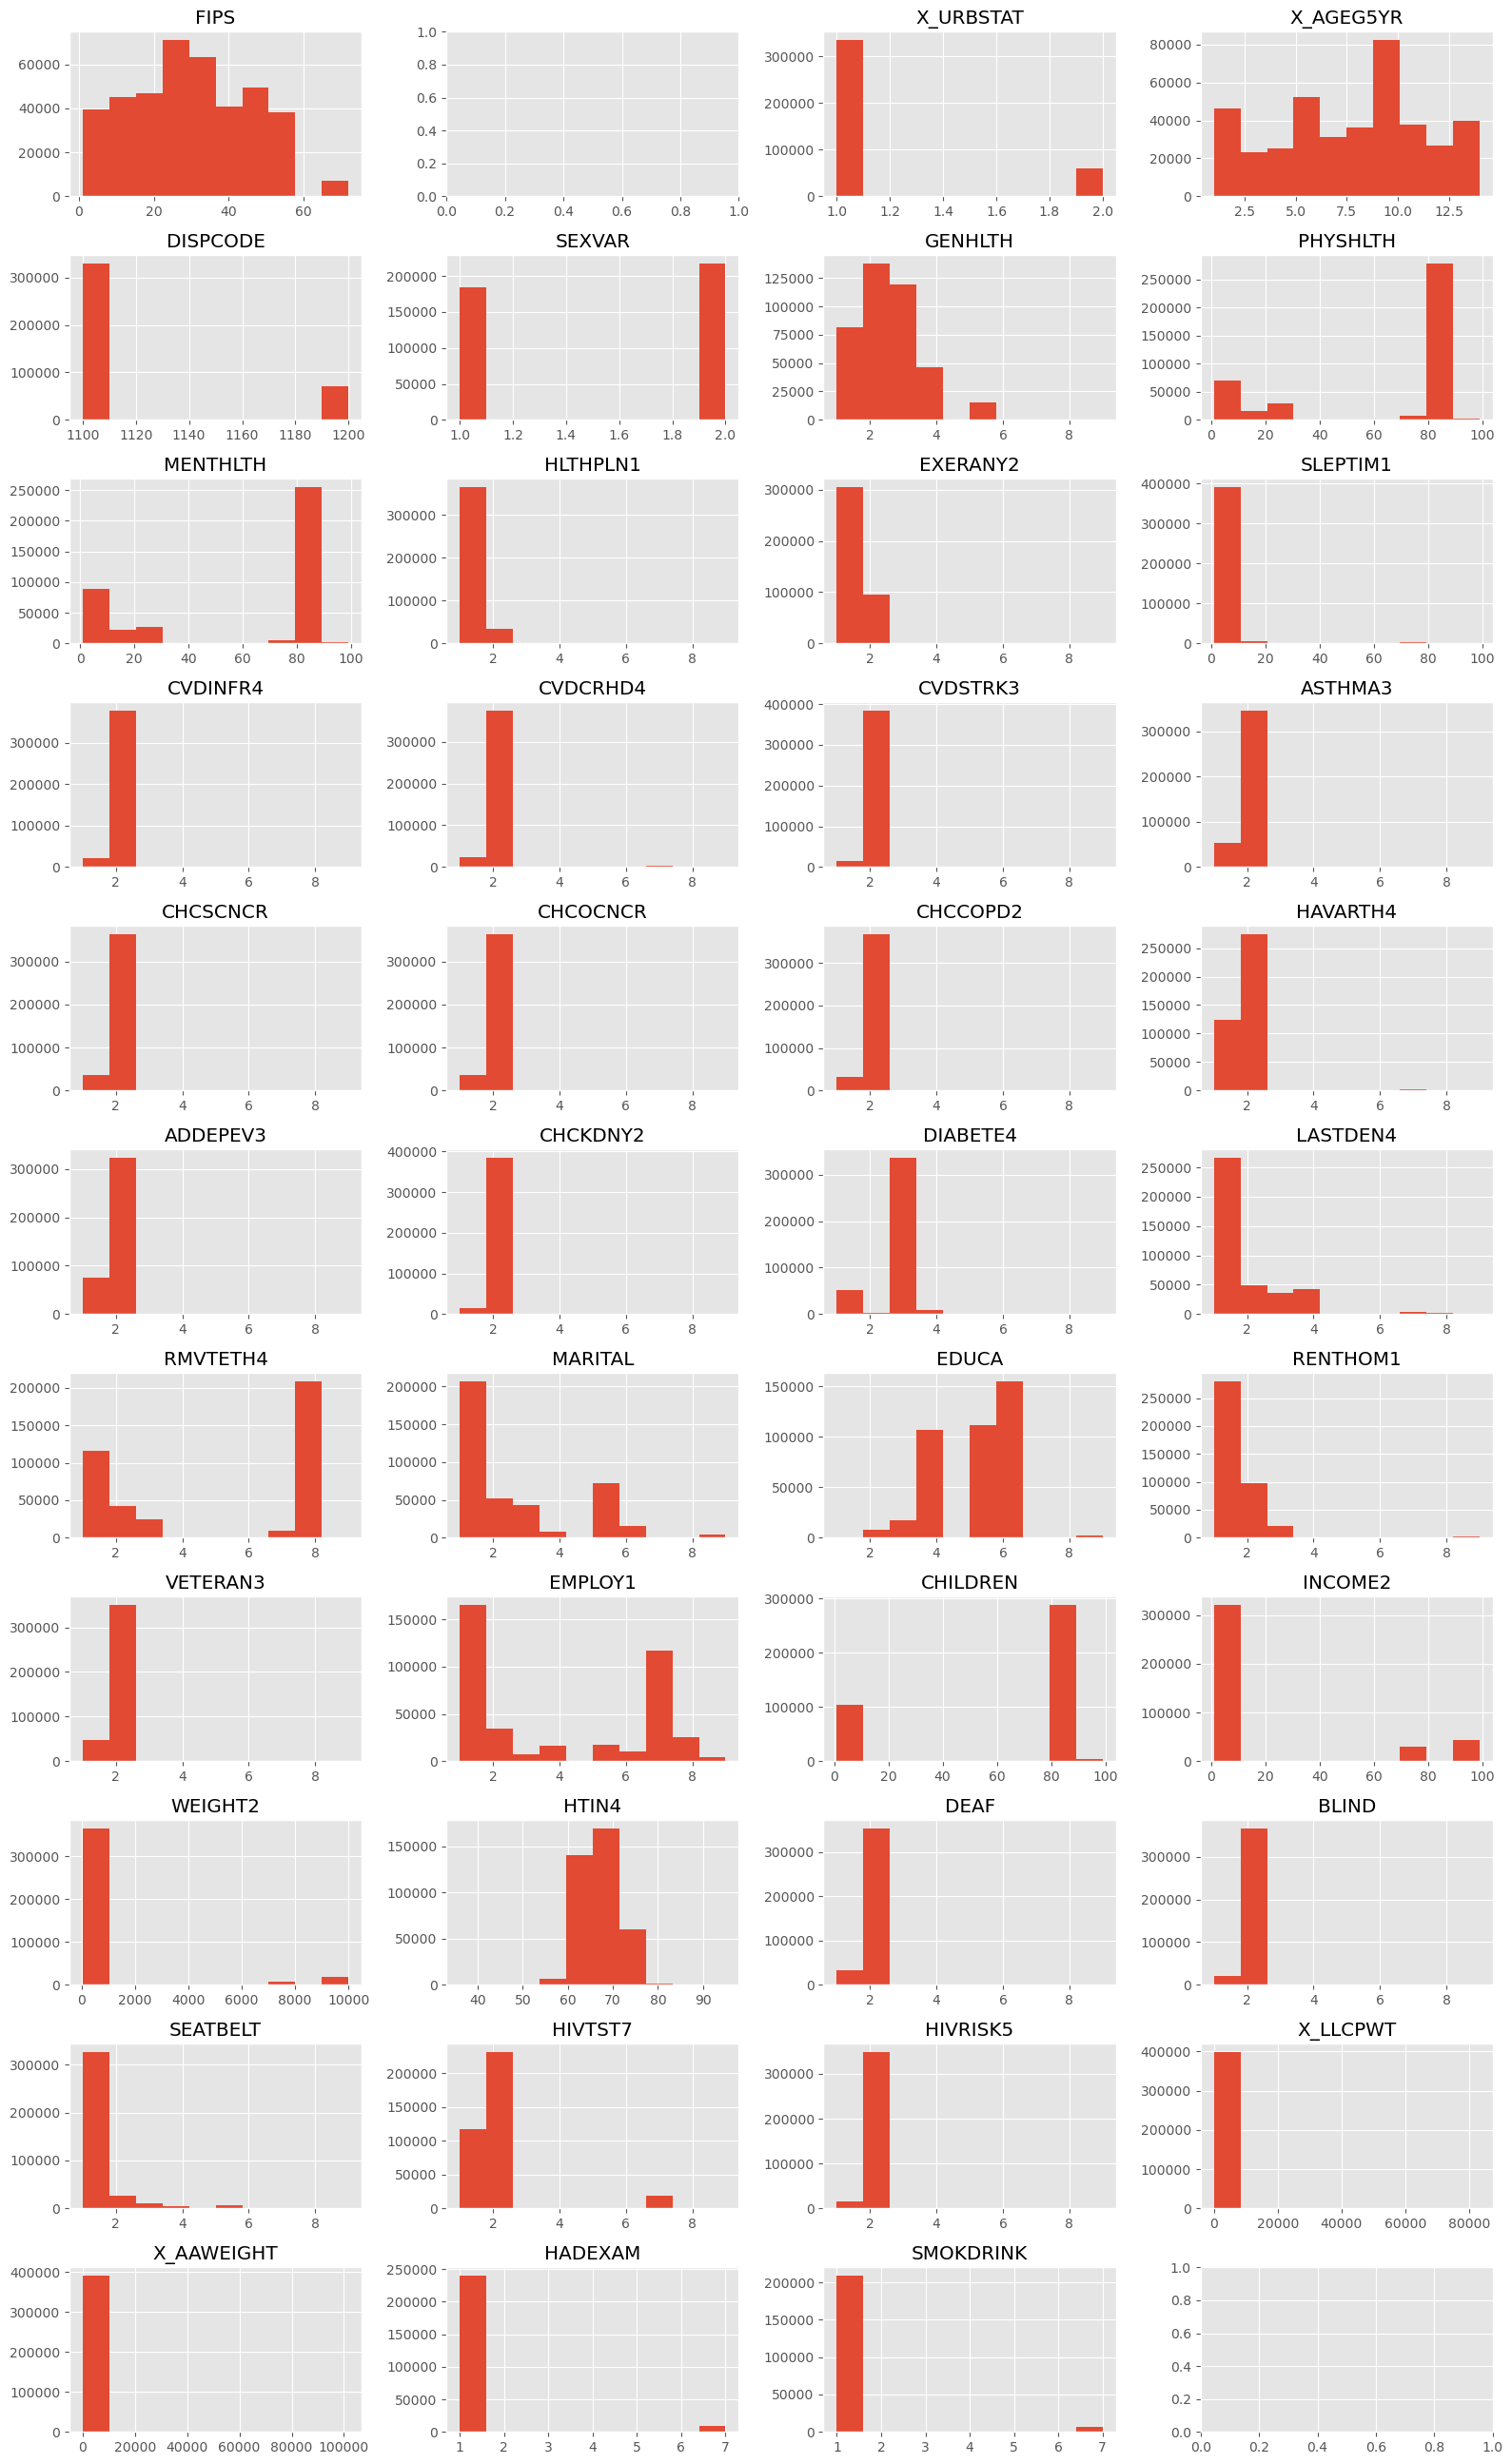

In [170]:
# View column plots

fig, axes = plt.subplots(11, 4, figsize=(16, 26))  # Adjust the figsize as needed

for i in range(11):  # Iterate over the rows
    for j in range(4):  # Iterate over the columns
        col_index = i * 4 + j
        if col_index < len(data.columns):# Check if column index is within the range of columns
            column_name = data.columns[col_index]
            if column_name == 'ST':
                continue
            axes[i, j].hist(data[column_name])
            axes[i, j].set_title(column_name)  # Set subplot title as column name

plt.tight_layout()  # Adjust subplot parameters to give specified padding
plt.show()

In [171]:
# drop ST column since it's a redundancy of FIPS
data.drop(columns= 'ST', inplace= True)

### 2. Feature Engineering to define the target variable

In [172]:
# Target variables will be 'CHCSCNCR', 'CHCOCNCR' which represent cancer [skin & any other type]
# Retrieve indices with missing values for target variables
nan_indices = data[data[['CHCSCNCR', 'CHCOCNCR']].isna().any(axis=1)].index

In [173]:
# Drop the rows with misssing values in out target variable above
data.drop(nan_indices, inplace=True)
data.reset_index(drop=True, inplace=True)

In [174]:
# Split data into predictor variables (X) and target variables (y)
X = data.drop(columns= ['CHCSCNCR', 'CHCOCNCR'])
y = data[['CHCSCNCR', 'CHCOCNCR']].copy()

In [175]:
# Combine y into a target with one column

y.loc[:, 'CHC_CNCR'] = 99  # Default uncertain value
y.loc[(data['CHCSCNCR'] == 1) | (data['CHCOCNCR'] == 1), 'CHC_CNCR'] = 1  # Indicates potential cancer
y.loc[(data['CHCSCNCR'] == 2) & (data['CHCOCNCR'] == 2), 'CHC_CNCR'] = 2  # Indicates no cancer
y = y.drop(columns= ['CHCSCNCR', 'CHCOCNCR']) # Drop initial columns used in combining
y.head()

,CHC_CNCR
0,2
1,1
2,2
3,1
4,2


### 3. Convert all metric values in the weight column to pounds [Imperial metric system]

In [176]:
# Convert weights given in kgs back to pounds
# Define functions

def convert_kg_to_lb(weight_kg):
    # Conversion factor from kilograms to pounds
    conversion_factor = 2.20462
    # Convert kilograms to pounds
    weight_lb = weight_kg * conversion_factor
    return weight_lb

def convert_back_to_pounds(weight_code):
    # Extract the numerical part after '9'
    weight_kg = int(str(weight_code)[1:].split('.')[0])
    # Convert kilograms to pounds
    weight_lb = convert_kg_to_lb(weight_kg)
    return weight_lb

# Define a function to apply to each value in the 'WEIGHT2' column
def apply_conversion(weight_code):
    if 9023 <= weight_code <= 9352:
        return convert_back_to_pounds(weight_code)
    else:
        return weight_code  # Keep the original value if not in the specified range

In [177]:
# Apply the function to the 'WEIGHT2' column using map
X['WEIGHT2'] = X['WEIGHT2'].map(apply_conversion)

### Define numerical from categorical columns

In [178]:
# Drop X_AAWEIGHT column not seen in codebook
X.drop(columns = 'X_AAWEIGHT', inplace= True)
# Drop DISPCODE since it's not relevant
X.drop(columns = 'DISPCODE', inplace= True)

In [179]:
# List of non-categorical columns
num_columns = ['PHYSHLTH', 'SLEPTIM1', 'MENTHLTH', 'CHILDREN', 'WEIGHT2', 'HTIN4']

# Iterate over columns and change the rest to categorical
for col in X.columns:
    if col not in num_columns:
        X[col] = X[col].astype('category')

In [180]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401955 entries, 0 to 401954
Data columns (total 38 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   FIPS       401955 non-null  category
 1   X_URBSTAT  394828 non-null  category
 2   X_AGEG5YR  401955 non-null  category
 3   SEXVAR     401955 non-null  category
 4   GENHLTH    401950 non-null  category
 5   PHYSHLTH   401953 non-null  float64 
 6   MENTHLTH   401953 non-null  float64 
 7   HLTHPLN1   401955 non-null  category
 8   EXERANY2   401955 non-null  category
 9   SLEPTIM1   401955 non-null  float64 
 10  CVDINFR4   401952 non-null  category
 11  CVDCRHD4   401955 non-null  category
 12  CVDSTRK3   401955 non-null  category
 13  ASTHMA3    401955 non-null  category
 14  CHCCOPD2   401953 non-null  category
 15  HAVARTH4   401953 non-null  category
 16  ADDEPEV3   401952 non-null  category
 17  CHCKDNY2   401952 non-null  category
 18  DIABETE4   401952 non-null  category
 19  LA

# Train-test Split

In [30]:
#Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

### Handling missing Values

In [57]:
#Instantiate KNN imputer
knn_imputer = KNNImputer(n_neighbors= 100, weights= 'distance')

# Fit to X_train data
knn_imputer.fit(X_train)

# Impute missing values on X_train dataset
X_train_imputed = pd.DataFrame(knn_imputer.transform(X_train), columns= X_train.columns, index=X_train.index)
# Impute missing values on X_test dataset
X_test_imputed = pd.DataFrame(knn_imputer.transform(X_test), columns= X_test.columns, index=X_test.index)

In [60]:
# Check number of unique values in the non-categorical columns to provide insights on whether to one-hot-encode
{col:len(X_train_imputed[col].value_counts()) for col in X_train_imputed[num_columns].columns}

{'PHYSHLTH': 35,
 'SLEPTIM1': 26,
 'MENTHLTH': 35,
 'CHILDREN': 3579,
 'WEIGHT2': 7943,
 'HTIN4': 17892}

In [62]:
# Function for clean-up after KNN imputation
def map_to_nearest_valid_value(df, column, valid_values):
    df[column] = df[column].apply(lambda x: min(valid_values, key=lambda y: abs(y - x)))

# Define mappings for each column
mappings = {
    'PHYSHLTH': list(range(1, 31)) + [88, 77, 99],
    'MENTHLTH': list(range(1, 31)) + [88, 77, 99],
    'SLEPTIM1': list(range(1, 25)) + [77, 99],
    'CHILDREN': list(range(1, 88)) + [88, 99],
    'X_AGEG5YR': list(range(1, 15)),
    'SEXVAR': [1, 2],
    'X_URBSTAT': [1, 2],
    'GENHLTH': [1, 2, 3, 4, 5, 7, 9],
    'HLTHPLN1': [1, 2, 7, 9],
    'EXERANY2': [1, 2, 7, 9],
    'CVDINFR4': [1, 2, 7, 9],
    'CVDCRHD4': [1, 2, 7, 9],
    'CVDSTRK3': [1, 2, 7, 9],
    'ASTHMA3': [1, 2, 7, 9],
    'CHCCOPD2': [1, 2, 7, 9],
    'HAVARTH4': [1, 2, 7, 9],
    'ADDEPEV3': [1, 2, 7, 9],
    'CHCKDNY2': [1, 2, 7, 9],
    'DIABETE4': [1, 2, 3, 4, 7, 9],
    'LASTDEN4': [1, 2, 3, 4, 7, 8, 9],
    'RMVTETH4': [1, 2, 3, 7, 8, 9],
    'MARITAL': [1, 2, 3, 4, 5, 6, 9],
    'EDUCA': [1, 2, 3, 4, 5, 6, 9],
    'RENTHOM1': [1, 2, 3, 7, 9],
    'VETERAN3': [1, 2, 7, 9],
    'EMPLOY1': [1, 2, 3, 4, 5, 6, 7, 8, 9],
    'INCOME2': [1, 2, 3, 4, 5, 6, 7, 8, 77, 99],
    'DEAF': [1, 2, 7, 9],
    'BLIND': [1, 2, 7, 9],
    'SEATBELT': [1, 2, 3, 4, 5, 7, 8, 9],
    'HIVTST7': [1, 2, 9],
    'HIVRISK5': [1, 2, 7, 9],
    'HADEXAM': [1, 2, 7],
    'SMOKDRINK': [1, 2, 7]
}

# Apply mappings to the X_train and X_test imputed dataframes
for column, valid_values in mappings.items():
    map_to_nearest_valid_value(X_train_imputed, column, valid_values)
    map_to_nearest_valid_value(X_test_imputed, column, valid_values)

In [63]:
# Assign invalid values (greater than 776 lbs) to value 7777
X_train_imputed.loc[(X_train_imputed['WEIGHT2'] > 776) & (X_train_imputed['WEIGHT2'] < 7778) , 'WEIGHT2'] = 7777
X_train_imputed.loc[X_train_imputed['WEIGHT2'] > 7777, 'WEIGHT2'] = 9999

X_test_imputed.loc[(X_test_imputed['WEIGHT2'] > 776) & (X_test_imputed['WEIGHT2'] < 7778) , 'WEIGHT2'] = 7777
X_test_imputed.loc[X_test_imputed['WEIGHT2'] > 7777, 'WEIGHT2'] = 9999

In [68]:
# Check of indices for X_train_imputed and X_test_imputed still match after imputation
print(all(X_train_imputed.index == X_train.index))
print(all(X_test_imputed.index == X_test.index))

In [69]:
# Re-check data structure after imputation
X_train_imputed

,FIPS,X_URBSTAT,X_AGEG5YR,SEXVAR,GENHLTH,PHYSHLTH,MENTHLTH,HLTHPLN1,EXERANY2,SLEPTIM1,...,WEIGHT2,HTIN4,DEAF,BLIND,SEATBELT,HIVTST7,HIVRISK5,X_LLCPWT,HADEXAM,SMOKDRINK
285161,39.0,1,6,1,3,88,88,1,1,8,...,188.0,69.0,2,2,1,2,2,750.791643,1,1
163053,25.0,1,9,2,2,88,5,1,1,6,...,185.0,63.0,2,2,1,1,2,196.090804,1,1
104402,19.0,1,9,2,3,88,88,1,1,6,...,9999.0,64.0,2,2,1,2,2,216.153724,1,1
19106,4.0,1,3,2,3,12,2,1,1,8,...,145.0,63.0,2,1,1,1,2,422.439604,1,1
341849,49.0,1,6,1,3,88,88,1,1,7,...,171.0,68.0,2,2,1,2,2,317.087789,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,36.0,1,2,2,3,88,88,2,1,8,...,121.0,65.0,2,2,1,1,2,2971.773990,1,1
365838,51.0,2,1,2,2,3,88,2,1,8,...,95.0,60.0,2,2,1,2,2,1863.069950,1,1
131932,23.0,2,1,2,2,88,88,1,1,6,...,120.0,63.0,2,2,3,2,2,241.030370,1,1
146867,24.0,1,5,1,4,20,20,1,2,6,...,185.0,71.0,2,2,1,2,2,217.652621,1,1


### Combine data for 'Refused to give data' and 'Don’t know/Not Sure' for particular columns

In [74]:
# Combine Refused (9) and Don’t know/Not Sure (7) columns
columns_1 = ['GENHLTH', 'HLTHPLN1', 'EXERANY2', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCCOPD2', 
             'HAVARTH4','ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'LASTDEN4', 'RMVTETH4', 'RENTHOM1', 'VETERAN3', 
             'DEAF', 'BLIND', 'SEATBELT', 'HIVTST7', 'HIVRISK5']

for col in columns_1:
    X_train_imputed.loc[X_train_imputed[col].isin([7, 9]), col] = 9
    X_test_imputed.loc[X_test_imputed[col].isin([7, 9]), col] = 9

In [75]:
# Combine Refused (99) and Don’t know/Not Sure (77) columns
columns_2 = ['PHYSHLTH', 'MENTHLTH', 'SLEPTIM1', 'INCOME2']

for col in columns_2:
    X_train_imputed.loc[X_train_imputed[col].isin([77, 99]), col] = 99
    X_test_imputed.loc[X_test_imputed[col].isin([77, 99]), col] = 99

In [76]:
# Combine Refused (9999) and Don’t know/Not Sure (7777) columns
columns_3 = ['WEIGHT2']

for col in columns_3:
    X_train_imputed.loc[X_train_imputed[col].isin([7777, 9999]), col] = 9999
    X_test_imputed.loc[X_test_imputed[col].isin([7777, 9999]), col] = 9999

In [77]:
# Confirm numerical columns
num_columns

['PHYSHLTH', 'SLEPTIM1', 'MENTHLTH', 'CHILDREN', 'WEIGHT2', 'HTIN4']

### Binning 'PHYSHLTH', 'MENTHLTH',  'SLEPTIM1', 'CHILDREN' columns

In [78]:
# Define bin ranges and labels for 'PHYSHLTH'& 'MENTHLTH'
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30]
bin_labels = ['1-3', '4-6', '7-9', '10-12', '13-15', '16-18', '19-21', '22-24', '25-27', '28-30']

# Create a new column and assign default value
X_train_imputed['PHYSHLTH_BINNED'] = 'unknown'
X_train_imputed['MENTHLTH_BINNED'] = 'unknown'

X_test_imputed['PHYSHLTH_BINNED'] = 'unknown'
X_test_imputed['MENTHLTH_BINNED'] = 'unknown'

# Iterate over bin ranges and assign bin labels
for i in range(len(bins) - 1):
    X_train_imputed.loc[(X_train_imputed['PHYSHLTH'] > bins[i]) & 
                        (X_train_imputed['PHYSHLTH'] <= bins[i+1]), 'PHYSHLTH_BINNED'] = bin_labels[i]
    X_train_imputed.loc[(X_train_imputed['MENTHLTH'] > bins[i]) 
                        & (X_train_imputed['MENTHLTH'] <= bins[i+1]), 'MENTHLTH_BINNED'] = bin_labels[i]
    
    X_test_imputed.loc[(X_test_imputed['PHYSHLTH'] > bins[i]) & 
                       (X_test_imputed['PHYSHLTH'] <= bins[i+1]), 'PHYSHLTH_BINNED'] = bin_labels[i]
    X_test_imputed.loc[(X_test_imputed['MENTHLTH'] > bins[i]) & 
                       (X_test_imputed['MENTHLTH'] <= bins[i+1]), 'MENTHLTH_BINNED'] = bin_labels[i]
    
# Handle special cases (88, 77, 99)
special_cases = [88, 77, 99]
for case in special_cases:
    X_train_imputed.loc[X_train_imputed['PHYSHLTH'] == case, 'PHYSHLTH_BINNED'] = str(case)
    X_train_imputed.loc[X_train_imputed['MENTHLTH'] == case, 'MENTHLTH_BINNED'] = str(case)
    
    X_test_imputed.loc[X_test_imputed['PHYSHLTH'] == case, 'PHYSHLTH_BINNED'] = str(case)
    X_test_imputed.loc[X_test_imputed['MENTHLTH'] == case, 'MENTHLTH_BINNED'] = str(case)

In [80]:
# Define bin ranges and labels for 'SLEPTIM1' 
bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
bin_labels = ['1-3', '4-6', '7-9', '10-12', '13-15', '16-18', '19-21', '22-24']


# Create a new column and assign default value
X_train_imputed['SLEPTIM1_BINNED'] = 'unknown'
X_test_imputed['SLEPTIM1_BINNED'] = 'unknown'

# Iterate over bin ranges and assign bin labels
for i in range(len(bins) - 1):
    X_train_imputed.loc[(X_train_imputed['SLEPTIM1'] > bins[i]) & 
                        (X_train_imputed['SLEPTIM1'] <= bins[i+1]), 'SLEPTIM1_BINNED'] = bin_labels[i]
    X_test_imputed.loc[(X_test_imputed['SLEPTIM1'] > bins[i]) & 
                       (X_test_imputed['SLEPTIM1'] <= bins[i+1]), 'SLEPTIM1_BINNED'] = bin_labels[i]

# Handle special cases (77, 99)
special_cases = [77, 99]
for case in special_cases:
    X_train_imputed.loc[X_train_imputed['SLEPTIM1'] == case, 'SLEPTIM1_BINNED'] = str(case)
    X_test_imputed.loc[X_test_imputed['SLEPTIM1'] == case, 'SLEPTIM1_BINNED'] = str(case)

In [84]:
# Define bins and labels for 'CHILDREN'
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 87]
bin_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11+']

# Create a new column and assign default value
X_train_imputed['CHILDREN_BINNED'] = 'unknown'
X_test_imputed['CHILDREN_BINNED'] = 'unknown'

# Iterate over bin ranges and assign bin labels
for i in range(len(bins)):
    if bins[i] == 87:
        X_train_imputed.loc[(X_train_imputed['CHILDREN'] > bins[i-1]) & 
                            (X_train_imputed['CHILDREN'] <= bins[i]), 'CHILDREN_BINNED'] = bin_labels[i]
        X_test_imputed.loc[(X_test_imputed['CHILDREN'] > bins[i-1]) & 
                           (X_test_imputed['CHILDREN'] <= bins[i]), 'CHILDREN_BINNED'] = bin_labels[i]

    else:
        X_train_imputed.loc[(X_train_imputed['CHILDREN'] == bins[i]), 'CHILDREN_BINNED'] = bin_labels[i]
        X_test_imputed.loc[(X_test_imputed['CHILDREN'] == bins[i]), 'CHILDREN_BINNED'] = bin_labels[i]


# Handle special cases (88, 99)
special_cases = [88, 99]
for case in special_cases:
    X_train_imputed.loc[X_train_imputed['CHILDREN'] == case, 'CHILDREN_BINNED'] = str(case)
    X_test_imputed.loc[X_test_imputed['CHILDREN'] == case, 'CHILDREN_BINNED'] = str(case)

In [86]:
# Drop initial columns now that they're binned: 'PHYSHLTH', 'MENTHLTH',  'SLEPTIM1', 'CHILDREN'
X_train_imputed.drop(columns= ['PHYSHLTH', 'MENTHLTH',  'SLEPTIM1', 'CHILDREN'], inplace= True)
X_test_imputed.drop(columns= ['PHYSHLTH', 'MENTHLTH',  'SLEPTIM1', 'CHILDREN'], inplace= True)

In [88]:
# Convert '9999' placeholder values in 'WEIGHT2' column to missing values, then impute them
X_train_imputed.loc[X_train_imputed['WEIGHT2'] == 9999, 'WEIGHT2'] = np.nan
X_test_imputed.loc[X_test_imputed['WEIGHT2'] == 9999, 'WEIGHT2'] = np.nan

In [90]:
# Create an instance of IterativeImputer
imputer = IterativeImputer()

# Define numerical columns for imputation
num_columns = ['WEIGHT2', 'HTIN4']

# Extract numerical columns from train and test sets
num_cols_X_train = X_train_imputed[num_columns]
num_cols_X_test = X_test_imputed[num_columns]

# Fit the imputer to the numerical columns in the train set
imputer.fit(num_cols_X_train)

# Impute missing values in the numerical columns for both train and test sets
num_cols_X_train_imputed = pd.DataFrame(imputer.transform(num_cols_X_train), 
                                        columns=num_columns, 
                                        index=X_train_imputed.index)
num_cols_X_test_imputed = pd.DataFrame(imputer.transform(num_cols_X_test), 
                                       columns=num_columns, 
                                       index=X_test_imputed.index)

In [92]:
# Replace WEIGHT2 & 'HTIN4' column in [X_train and X_test] with the respective imputed columns
X_train_imputed[['WEIGHT2', 'HTIN4']] = num_cols_X_train_imputed[['WEIGHT2', 'HTIN4']]
X_test_imputed[['WEIGHT2', 'HTIN4']] = num_cols_X_test_imputed[['WEIGHT2', 'HTIN4']]

In [94]:
# Remaining numerical columns/Features
num_columns

['WEIGHT2', 'HTIN4']

In [97]:
# Convert non-numerical columns to categorical dtypes explicitly
for col in X_train_imputed.columns:
    if col not in num_columns:
        X_train_imputed[col] = X_train_imputed[col].astype('category')
        X_test_imputed[col] = X_test_imputed[col].astype('category')

### Save Processed data

In [100]:
# Save DataFrame to CSV file in a specific directory
X_train_imputed.to_csv('/Users/dave/Documents/Flatiron/Capstone Project/Cancer-Screening-Project/Data/X_train_processed.csv', 
                       index=True)  #Save processed X_train data
y_train.to_csv('/Users/dave/Documents/Flatiron/Capstone Project/Cancer-Screening-Project/Data/y_train_processed.csv', 
               index=True)          #Save processed y_train data
X_test_imputed.to_csv('/Users/dave/Documents/Flatiron/Capstone Project/Cancer-Screening-Project/Data/X_test_processed.csv', 
                      index=True)  #Save processed X_test data
y_test.to_csv('/Users/dave/Documents/Flatiron/Capstone Project/Cancer-Screening-Project/Data/y_test_processed.csv', 
              index=True)          #Save processed y_test data

# >>>>>>>

### Load Processed data

In [181]:
# Load preprocessed X_train and X_test 
X_train_imputed = pd.read_csv('/Users/dave/Documents/Flatiron/Capstone Project/Cancer-Screening-Project/Data/X_train_processed.csv', 
                              index_col=0, low_memory=False)
y_train = pd.read_csv('/Users/dave/Documents/Flatiron/Capstone Project/Cancer-Screening-Project/Data/y_train_processed.csv', 
                      index_col=0, low_memory=False)
X_test_imputed = pd.read_csv('/Users/dave/Documents/Flatiron/Capstone Project/Cancer-Screening-Project/Data/X_test_processed.csv', 
                             index_col=0, low_memory=False)
y_test = pd.read_csv('/Users/dave/Documents/Flatiron/Capstone Project/Cancer-Screening-Project/Data/y_test_processed.csv', index_col=0, 
                     low_memory=False)

In [182]:
num_columns = ['WEIGHT2', 'HTIN4', 'X_LLCPWT']

In [183]:
# Iterate over the columns of the DataFrame
for column in X_train_imputed.columns:
    # Check if the column is not in the list of non-categorical columns
    if column not in num_columns:
        # Convert the column to categorical or object dtype
        X_train_imputed[column] = X_train_imputed[column].astype('category')  # Change 'category' to 'object' 
        X_test_imputed[column] = X_test_imputed[column].astype('category')  # Change 'category' to 'object' 

In [184]:
# Change y-sets into category type
y_train['CHC_CNCR'] = y_train['CHC_CNCR'].astype('category')
y_test['CHC_CNCR'] = y_test['CHC_CNCR'].astype('category')

##### Remove class '99' where values represent 'Refused to provide data' or 'Don't know/Not sure' 

In [185]:
# Remove class '99' in target variable [y]
# Identify indices where y_train['CHC_CNCR'] is 99
rm_indices_train = list(y_train[y_train['CHC_CNCR'] == 99].index)
rm_indices_test = list(y_test[y_test['CHC_CNCR'] == 99].index)

# Remove instances with class label '99' from the training set
y_train = y_train.drop(index=rm_indices_train)
X_train_final = X_train_imputed.drop(index=rm_indices_train)

# Remove instances with class label '99' from the test set
y_test = y_test.drop(index=rm_indices_test)
X_test_final = X_test_imputed.drop(index=rm_indices_test)

In [186]:
# Check if all indices match
print(all(X_train_final.index == y_train.index))
print(all(X_test_final.index == y_test.index))

True
True


# Exploratory Data Analysis

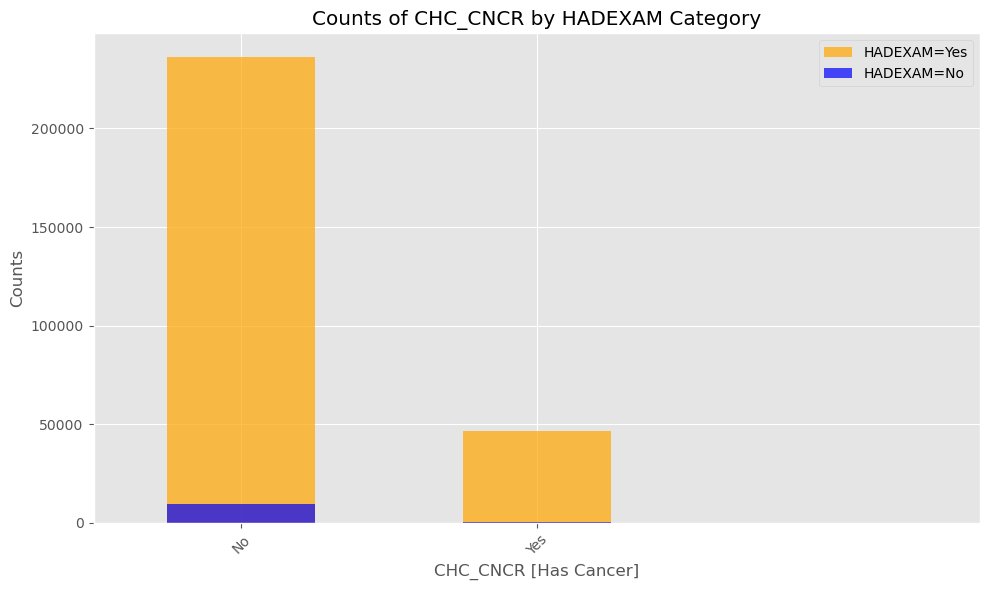

In [187]:
# Concatenate X_train_imputed and y_train along the columns axis
train_data = pd.concat([X_train_imputed, y_train], axis=1)

# Filter the data based on the condition HADEXAM == 1 and HADEXAM == 2 from X_test_imputed
hadexam_feature = train_data.loc[train_data['HADEXAM'] == 1, 'CHC_CNCR']
noexam_feature = train_data.loc[train_data['HADEXAM'] == 2, 'CHC_CNCR']

# Count the occurrences of each category in the specified features
hadexam_counts = hadexam_feature.value_counts()
noexam_counts = noexam_feature.value_counts()

# Plot the counts using a bar plot
plt.figure(figsize=(10, 6))
hadexam_counts.plot(x=hadexam_counts.index, kind='bar',  color='orange', alpha=0.7, label='HADEXAM=Yes')
noexam_counts.plot(x=hadexam_counts.index, kind='bar',  color='blue', alpha=0.7, label='HADEXAM=No')
plt.title('Counts of CHC_CNCR by HADEXAM Category')
plt.xlabel('CHC_CNCR [Has Cancer]')
plt.ylabel('Counts')
plt.legend()
plt.xticks(range(0, 2), labels= ['No', 'Yes'], rotation=45)
plt.tight_layout()
plt.show()

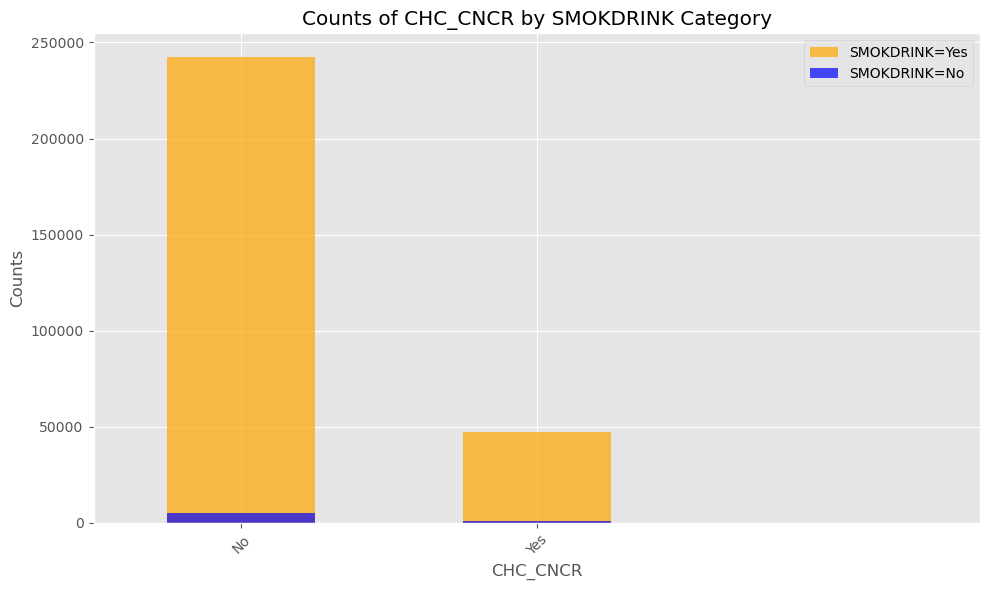

In [188]:
# Filter the data based on the condition SMOKDRINK == 1 and SMOKDRINK == 2 from X_test_imputed
smokedrink = train_data.loc[train_data['SMOKDRINK'] == 1, 'CHC_CNCR']
doesnt_smokedrink = train_data.loc[train_data['SMOKDRINK'] == 2, 'CHC_CNCR']

# Count the occurrences of each category in the specified features
smokedrink_counts = smokedrink.value_counts()
doesnt_smokedrink_counts = doesnt_smokedrink.value_counts()

# Plot the counts using a bar plot
plt.figure(figsize=(10, 6))
smokedrink_counts.plot(x=smokedrink_counts.index, kind='bar', color='orange', alpha=0.7, label='SMOKDRINK=Yes')
doesnt_smokedrink_counts.plot(x=doesnt_smokedrink_counts.index, 
                              kind='bar', color='blue', alpha=0.7, label='SMOKDRINK=No')
plt.title('Counts of CHC_CNCR by SMOKDRINK Category')
plt.ylabel('SMOKDRINK [Smokes or Drinks]')
plt.ylabel('Counts')
plt.legend()
plt.xticks(range(0, 2), labels= ['No', 'Yes'], rotation=45)
plt.tight_layout()
plt.show()

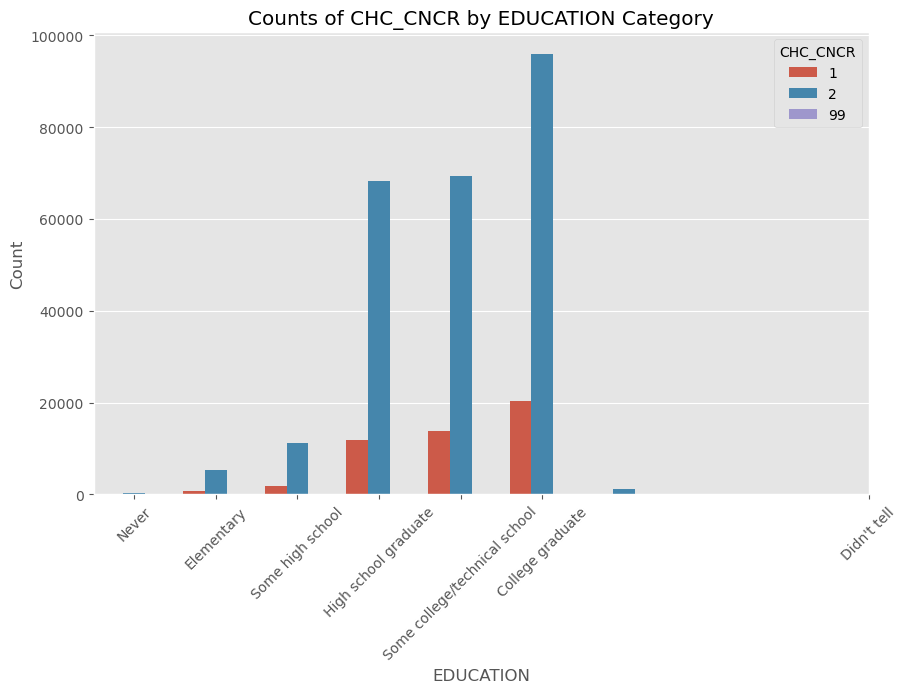

In [190]:
import seaborn as sns

# Set the figure size
plt.figure(figsize=(10, 6))

# Use seaborn to plot
sns.countplot(x='EDUCA', hue='CHC_CNCR', data=train_data)

# Set title and labels
plt.title('Counts of CHC_CNCR by EDUCATION Category')
plt.xlabel('EDUCATION')
plt.ylabel('Count')
plt.xticks(list(range(0, 6)) + [9], labels=['Never', 
                                            'Elementary', 
                                            'Some high school', 
                                            'High school graduate', 
                                            'Some college/technical school', 
                                            'College graduate', 
                                            'Didn\'t tell'], rotation=45)
# Show plot
plt.show()

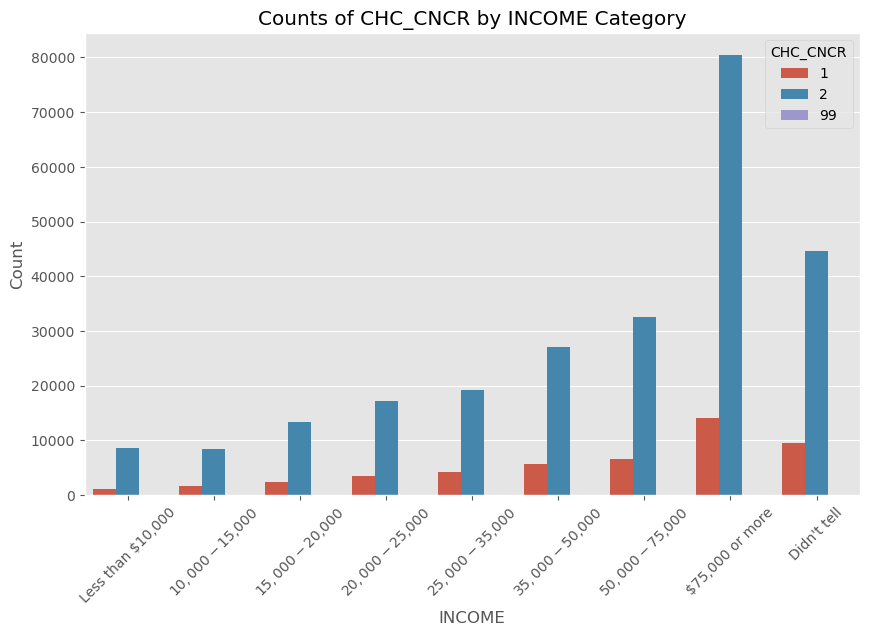

In [192]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Use seaborn to plot
sns.countplot(x='INCOME2', hue='CHC_CNCR', data=train_data)

# Set title and labels
plt.title('Counts of CHC_CNCR by INCOME Category')
plt.xlabel('INCOME')
plt.ylabel('Count')
plt.xticks(list(range(0, 9)), labels=['Less than $10,000', 
                                       '$10,000 - $15,000', 
                                       '$15,000 - $20,000', 
                                       '$20,000 - $25,000', 
                                       '$25,000 - $35,000', 
                                       '$35,000 - $50,000', 
                                       '$50,000 - $75,000',
                                       '$75,000 or more',
                                       'Didn\'t tell'], rotation=45)

# Show plot
plt.show()

# Class Imbalance 

### Address class imbalance since class 2 in approximately 5 time overpresented compared to class 1

/var/folders/6s/tl4bp6ld5hn0_f_lz0b38n780000gn/T/ipykernel_2329/2273500741.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('coolwarm')


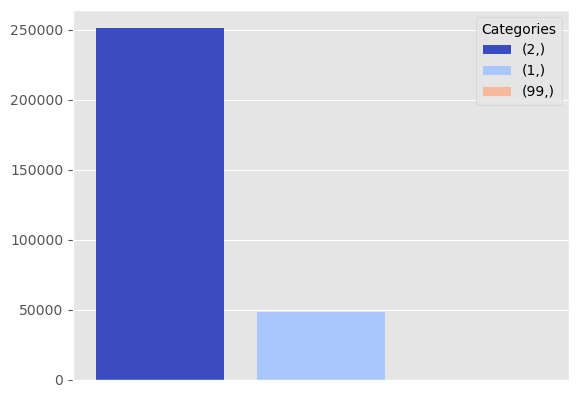

In [193]:
import matplotlib.cm as cm
# Choose a colormap
colormap = cm.get_cmap('coolwarm')
# Determine the number of colors needed
num_colors = len(y_train.value_counts())
# Generate colors from the colormap
colors = [colormap(i / num_colors) for i in range(num_colors)]
# Make plot
plt.bar([1, 2, 3], y_train.value_counts(), label= list(y_train.value_counts().index), color=colors)
plt.legend(title = 'Categories')
plt.xticks([]);

In [195]:
# Numerical columns/Features
num_columns

['WEIGHT2', 'HTIN4', 'X_LLCPWT']

##### 1. Use SMOTE on X_train & y_train data to address class imbalance,
##### 2. Scale Numerical Features
##### 3. One-Hot_Encode Categorical Features

In [135]:
# Define categorical features and numerical features
categorical_features = [col for col in X_train_imputed.columns if col not in num_columns]
numerical_features = ['WEIGHT2', 'HTIN4', 'X_LLCPWT']

# Define preprocessing steps for categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

# Define the pipeline with preprocessing and SMOTE
pipeline = imb_Pipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42))
])

# Apply the pipeline to the entire dataset
X_train_ohe_resampled, y_train_resampled = pipeline.fit_resample(X_train_final, y_train)

In [136]:
# Apply the pipeline's preprocessor to the test set [SMOTE is not applied on X_test]
X_test_ohe = pipeline.named_steps['preprocessor'].transform(X_test_final)

In [137]:
# Convert X_train_ohe_resampled & X_test_ohe back to dataframes
X_train_ohe_resampled_df = pd.DataFrame(X_train_ohe_resampled.toarray(), 
                                        columns= pipeline.get_feature_names_out())
# Convert X_test_ohe back to dataframes
X_test_ohe_df = pd.DataFrame(X_test_ohe.toarray(), 
                            columns= pipeline.get_feature_names_out(),
                            index= X_test_final.index)

In [138]:
# Check new colums after OneHot Encoding
X_test_ohe_df.columns

Index(['cat__FIPS_1.0', 'cat__FIPS_2.0', 'cat__FIPS_4.0', 'cat__FIPS_5.0',
       'cat__FIPS_6.0', 'cat__FIPS_8.0', 'cat__FIPS_9.0', 'cat__FIPS_10.0',
       'cat__FIPS_11.0', 'cat__FIPS_12.0',
       ...
       'cat__CHILDREN_BINNED_5', 'cat__CHILDREN_BINNED_6',
       'cat__CHILDREN_BINNED_7', 'cat__CHILDREN_BINNED_8',
       'cat__CHILDREN_BINNED_88', 'cat__CHILDREN_BINNED_9',
       'cat__CHILDREN_BINNED_99', 'num__WEIGHT2', 'num__HTIN4',
       'num__X_LLCPWT'],
      dtype='object', length=236)

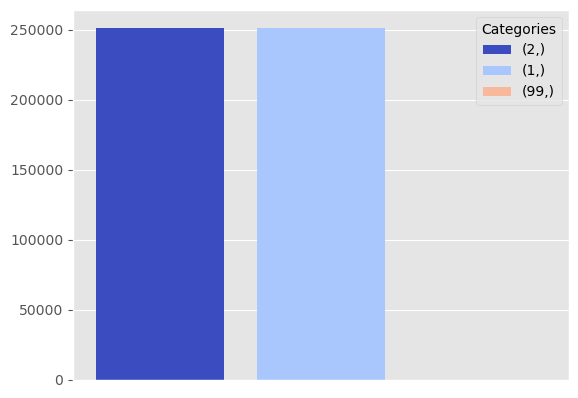

In [197]:
# Make plot to check classes after applying SMOTE
plt.bar([1, 2, 3], y_train_resampled.value_counts(), label= list(y_train.value_counts().index), color=colors)
plt.legend(title = 'Categories')
plt.xticks([]);

# Modeling 

In [198]:
import warnings

# Ignore data conversion warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [226]:
# Import GridSearchCV module
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
#RadomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
#Support Vector Machines
from sklearn.svm import LinearSVC
#XGBoost
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
#Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB
#Feature Selection
from sklearn.feature_selection import RFE

In [200]:
# Import neural networks libraries
import scikeras
import tensorflow as tf
from tensorflow.keras import Sequential
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Dense, Dropout, InputLayer, Conv1D, Conv2D, MaxPooling1D, Flatten, Input
from tensorflow.keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [201]:
# Import joblib to save best model
import joblib

In [202]:
# Seclude weight-related columns from dataframes
X_train_excluding_weights = X_train_ohe_resampled_df.drop(columns='num__X_LLCPWT')
X_test_excluding_weights = X_test_ohe_df.drop(columns='num__X_LLCPWT')

# Weights
train_weights = X_train_ohe_resampled_df['num__X_LLCPWT']
test_weights = X_test_ohe_df['num__X_LLCPWT']

### Logistic Regression

##### Base Model

In [210]:
# Instantiate the Model
lr_model = LogisticRegression(penalty='elasticnet', 
                              l1_ratio=0.5, 
                              C= 0.0001, 
                              solver='saga', 
                              max_iter= 300)

# Train the Model
lr_model.fit(X_train_excluding_weights, y_train_resampled)

# Evaluate the Model
# Predict on the training set
train_pred = lr_model.predict(X_train_excluding_weights)

# Calculate accuracy
accuracy_train = accuracy_score(y_train_resampled, train_pred)
print("Train Accuracy:", accuracy_train)

# Display classification report
print("Train Classification Report:")
print(classification_report(y_train_resampled, train_pred))
print('\n')

# Evaluate the Model
# Predict on the testing set
test_pred = lr_model.predict(X_test_excluding_weights)

# Calculate accuracy
accuracy_test = accuracy_score(y_test, test_pred)
print("Test Accuracy:", accuracy_test)

# Display classification report
print("Test Classification Report:")
print(classification_report(y_test, test_pred))

Train Accuracy: 0.6991639799800436
Train Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.70      0.70    251549
           2       0.70      0.70      0.70    251549

    accuracy                           0.70    503098
   macro avg       0.70      0.70      0.70    503098
weighted avg       0.70      0.70      0.70    503098



Test Accuracy: 0.6956391368229567
Test Classification Report:
              precision    recall  f1-score   support

           1       0.30      0.66      0.42     16423
           2       0.91      0.70      0.79     83626

    accuracy                           0.70    100049
   macro avg       0.61      0.68      0.61    100049
weighted avg       0.81      0.70      0.73    100049



In [211]:
# Retrieve coefficients and put them in a dataframe
coefficients = pd.DataFrame(lr_model.coef_.reshape(-1), 
                            index= lr_model.feature_names_in_, 
                            columns= ['Coefficients'])

# Sort the coefficients by descending order of magnitude 
coefficients.sort_values(by='Coefficients', ascending= False)

# Create a DataFrame for positive coefficients
positive_coefficients = coefficients[coefficients['Coefficients'] > 0]
positive_coefficients = positive_coefficients.sort_values(by='Coefficients', ascending=False)

# Create a DataFrame for negative coefficients
negative_coefficients = coefficients[coefficients['Coefficients'] < 0]
negative_coefficients = negative_coefficients.sort_values(by='Coefficients', ascending=True)

In [212]:
# View positive coefficients
print(positive_coefficients)

                 Coefficients
cat__MARITAL_5       0.310093
cat__EMPLOY1_1       0.179988
cat__HAVARTH4_2      0.179159
cat__GENHLTH_1       0.045142
cat__RMVTETH4_8      0.043651
num__WEIGHT2         0.004148
cat__RENTHOM1_2      0.000044


In [213]:
# View negative coefficients
print(negative_coefficients)

                         Coefficients
cat__EMPLOY1_7              -0.730422
cat__CHILDREN_BINNED_88     -0.509170
cat__RENTHOM1_1             -0.374915
cat__HAVARTH4_1             -0.221764
cat__X_AGEG5YR_13           -0.202972
cat__LASTDEN4_1             -0.138030
cat__EDUCA_6                -0.053679
cat__X_AGEG5YR_12           -0.038697
cat__HLTHPLN1_1             -0.038342
cat__MARITAL_1              -0.034061
cat__X_AGEG5YR_11           -0.024660


##### Improved Model

In [217]:
# Define the logistic regression model
lr_model_2 = LogisticRegression(solver='saga', max_iter= 300)

# Define the hyperparameters and their values to search
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization type
    'C': [0.0001, 0.001, 0.01],   # Regularization strength
    'l1_ratio': [0.5]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=lr_model_2, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train_excluding_weights, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.01, 'l1_ratio': 0.5, 'penalty': 'l2'}


In [218]:
# Use the best hyperparameters to train the final model
final_model = LogisticRegression(**best_params, solver='saga', max_iter= 300)
final_model.fit(X_train_excluding_weights, y_train_resampled)

# Evaluate the Model
# Predict on the training set
train_pred = final_model.predict(X_train_excluding_weights)

# Calculate accuracy
accuracy_train = accuracy_score(y_train_resampled, train_pred)
print("Train Accuracy:", accuracy_train)

# Display classification report
print("Train Classification Report:")
print(classification_report(y_train_resampled, train_pred))
print('\n')


# Predict on the testing set
y_pred = final_model.predict(X_test_excluding_weights)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Display classification report
print("Test Classification Report:")
print(classification_report(y_test, y_pred))

Train Accuracy: 0.7333263101821116
Train Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.79      0.75    251549
           2       0.77      0.67      0.72    251549

    accuracy                           0.73    503098
   macro avg       0.74      0.73      0.73    503098
weighted avg       0.74      0.73      0.73    503098



Test Accuracy: 0.6857239952423313
Test Classification Report:
              precision    recall  f1-score   support

           1       0.31      0.75      0.44     16423
           2       0.93      0.67      0.78     83626

    accuracy                           0.69    100049
   macro avg       0.62      0.71      0.61    100049
weighted avg       0.83      0.69      0.73    100049



### Random Forest

##### Base Model

In [219]:
# Instantiate Random Forest classifier
rf_model = RandomForestClassifier()

# Fit the model to the training set
rf_model.fit(X_train_excluding_weights, y_train_resampled)

# Evaluate the Model
# Predict on the training set
train_pred = rf_model.predict(X_train_excluding_weights)

# Calculate accuracy
accuracy_train = accuracy_score(y_train_resampled, train_pred)
print("Train Accuracy:", accuracy_train)

# Display classification report
print("Train Classification Report:")
print(classification_report(y_train_resampled, train_pred))
print('\n')

# Predict classes on the testing set
test_pred = rf_model.predict(X_test_excluding_weights)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_pred)
rf_report = classification_report(y_test, test_pred)
print("Test Accuracy:", test_accuracy)
print("\n")
print("Test Classification Report:")
print(rf_report)

Train Accuracy: 0.999998012315692
Train Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    251549
           2       1.00      1.00      1.00    251549

    accuracy                           1.00    503098
   macro avg       1.00      1.00      1.00    503098
weighted avg       1.00      1.00      1.00    503098



Test Accuracy: 0.8329118731821408


Test Classification Report:
              precision    recall  f1-score   support

           1       0.46      0.12      0.19     16423
           2       0.85      0.97      0.91     83626

    accuracy                           0.83    100049
   macro avg       0.66      0.55      0.55    100049
weighted avg       0.79      0.83      0.79    100049



##### Feature Selection

In [220]:
# Get the names of the columns from the feature names output by the pipeline
feature_names = rf_model.feature_names_in_
# Create a Series with feature importances, using column names as index
feature_importance = pd.Series(rf_model.feature_importances_, index=feature_names, name='Feature_Importance')
# Sort the feature importances in descending order
feature_importance_sorted = feature_importance.sort_values(ascending=False)
# Display the top 10 most important features
feature_importance_sorted[:100]

cat__EMPLOY1_7             0.056065
cat__CHILDREN_BINNED_88    0.032662
num__WEIGHT2               0.028638
cat__RENTHOM1_1            0.028007
num__HTIN4                 0.027586
                             ...   
cat__INCOME2_3             0.002953
cat__FIPS_12.0             0.002939
cat__FIPS_20.0             0.002889
cat__CHCKDNY2_1            0.002843
cat__EMPLOY1_8             0.002799
Name: Feature_Importance, Length: 100, dtype: float64

In [221]:
# 100 most important features
feature_importance_sorted[:100].index

Index(['cat__EMPLOY1_7', 'cat__CHILDREN_BINNED_88', 'num__WEIGHT2',
       'cat__RENTHOM1_1', 'num__HTIN4', 'cat__EMPLOY1_1', 'cat__HAVARTH4_1',
       'cat__LASTDEN4_1', 'cat__MENTHLTH_BINNED_88', 'cat__X_AGEG5YR_13',
       'cat__HAVARTH4_2', 'cat__MARITAL_5', 'cat__X_AGEG5YR_11',
       'cat__MARITAL_1', 'cat__RENTHOM1_2', 'cat__RMVTETH4_8',
       'cat__X_AGEG5YR_12', 'cat__X_AGEG5YR_9', 'cat__X_AGEG5YR_10',
       'cat__INCOME2_8', 'cat__EDUCA_6', 'cat__PHYSHLTH_BINNED_88',
       'cat__X_AGEG5YR_8', 'cat__GENHLTH_1', 'cat__SLEPTIM1_BINNED_7-9',
       'cat__EDUCA_4', 'cat__HIVTST7_2', 'cat__MARITAL_3', 'cat__HIVTST7_1',
       'cat__RMVTETH4_1', 'cat__GENHLTH_2', 'cat__X_AGEG5YR_7', 'cat__EDUCA_5',
       'cat__SLEPTIM1_BINNED_4-6', 'cat__GENHLTH_3', 'cat__SEATBELT_1',
       'cat__MARITAL_2', 'cat__X_AGEG5YR_6', 'cat__LASTDEN4_2',
       'cat__HLTHPLN1_1', 'cat__INCOME2_99', 'cat__X_AGEG5YR_4',
       'cat__CHILDREN_BINNED_2', 'cat__HLTHPLN1_2', 'cat__DIABETE4_3',
       'cat__D

In [224]:
# Function to remove the trailing OHE value from the features
def unique_values_without_last_underscore(data):
    unique_values = set()
    for item in data:
        last_underscore_index = item.rfind('_')  # Find the index of the last underscore
        if last_underscore_index != -1:  # If an underscore is found
            unique_values.add(item[:last_underscore_index])  # Remove everything after the last underscore and add to set
        else:
            unique_values.add(item)  # If no underscore is found, add the whole item
    return list(unique_values)

# Apply function to check top 30 unique features without the trailing OHE value
top_features = unique_values_without_last_underscore(list(feature_importance_sorted[:100].index))
top_features

['cat__EMPLOY1',
 'cat__FIPS',
 'cat__HLTHPLN1',
 'cat__VETERAN3',
 'cat__SEATBELT',
 'cat__DIABETE4',
 'cat__LASTDEN4',
 'num_',
 'cat__MENTHLTH_BINNED',
 'cat__HAVARTH4',
 'cat__GENHLTH',
 'cat__MARITAL',
 'cat__CHILDREN_BINNED',
 'cat__INCOME2',
 'cat__X_URBSTAT',
 'cat__CHCCOPD2',
 'cat__SLEPTIM1_BINNED',
 'cat__X_AGEG5YR',
 'cat__EDUCA',
 'cat__CVDINFR4',
 'cat__RENTHOM1',
 'cat__ASTHMA3',
 'cat__SEXVAR',
 'cat__CHCKDNY2',
 'cat__CVDCRHD4',
 'cat__PHYSHLTH_BINNED',
 'cat__DEAF',
 'cat__ADDEPEV3',
 'cat__RMVTETH4',
 'cat__EXERANY2',
 'cat__HIVTST7']

##### Using Recursive Feature Elimination

In [223]:
# Check initial number of columns 
X_train_excluding_weights.shape

(503098, 235)

In [227]:
# Instantiate the estimator (model)
estimator = RandomForestClassifier()

# Instantiate RFE with the estimator and number of features to select
rfe = RFE(estimator, n_features_to_select=100)

# Fit RFE to your data
rfe.fit(X_train_excluding_weights, y_train_resampled)

# Access selected features
selected_features = rfe.support_

print("Selected Features:", selected_features)

Selected Features: [False False False False False False False False False  True False False
 False False False False  True False False False  True False False  True
 False False False  True False False False False  True False False  True
 False False False False False False False False  True False False  True
 False False False False False  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True False  True  True False  True  True False False
  True False  True  True False False  True False  True  True False  True
  True False  True  True False  True  True False  True  True False  True
 False  True False False  True  True  True  True False False  True  True
  True  True False  True  True  True False  True False False False False
 False  True  True  True False  True  True False False  True  True False
  True  True False False False False  True False False False False  True
  True  True  True  True  True  

cat__CHILDREN_BINNED_10       136
cat__CHILDREN_BINNED_9        135
cat__SLEPTIM1_BINNED_22-24    134
cat__CHILDREN_BINNED_8        133
cat__CHILDREN_BINNED_7        132
                             ... 
cat__RENTHOM1_2                 1
cat__RENTHOM1_1                 1
cat__GENHLTH_4                  1
cat__EDUCA_6                    1
num__HTIN4                      1
Name: Feature_Importance, Length: 235, dtype: int64

In [238]:
# Important features
feature_importance = pd.Series(rfe.ranking_, 
                               index=rfe.feature_names_in_, 
                               name='Feature_Importance').sort_values(ascending=False)

In [239]:
# Extracting selected features
# Variable to hold selected features
select_features = []
# Iterate through features and their corresponding masking status
for feature, mask in zip(feature_importance.index, selected_features):
    if mask == True:
        # Append the selected features in the select_features list
        select_features.append(feature)

##### Base Model -select features

In [242]:
# Select features from the training and test sets based on selected features
X_train_rf_select_features = X_train_excluding_weights[select_features]
X_test_rf_select_features = X_test_excluding_weights[select_features]

# Instantiate Random Forest classifier
rf_model_2 = RandomForestClassifier()

# Fit the model to the training set with selected features
rf_model_2.fit(X_train_rf_select_features, y_train_resampled)

# Evaluate the Model
# Predict on the training set
train_pred = rf_model_2.predict(X_train_rf_select_features)

# Calculate accuracy
accuracy_train = accuracy_score(y_train_resampled, train_pred)
print("Train Accuracy:", accuracy_train)

# Display classification report
print("Train Classification Report:")
print(classification_report(y_train_resampled, train_pred))
print('\n')

# Predict classes on the test set with selected features
test_pred = rf_model_2.predict(X_test_rf_select_features)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, test_pred)
rf_report = classification_report(y_test, test_pred)
print("Test Accuracy:", test_accuracy)
print("\n")
print(rf_report)

Train Accuracy: 0.9975054561934256
Train Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00    251549
           2       1.00      1.00      1.00    251549

    accuracy                           1.00    503098
   macro avg       1.00      1.00      1.00    503098
weighted avg       1.00      1.00      1.00    503098



Test Accuracy: 0.8168797289328229


              precision    recall  f1-score   support

           1       0.32      0.11      0.16     16423
           2       0.84      0.96      0.90     83626

    accuracy                           0.82    100049
   macro avg       0.58      0.53      0.53    100049
weighted avg       0.76      0.82      0.78    100049



##### Improved Model

In [243]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate Random Forest classifier
rf_model_3 = RandomForestClassifier()

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_model_3, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train_rf_select_features, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train the final model
final_model = RandomForestClassifier(**best_params)

# Fit final model to training data
final_model.fit(X_train_rf_select_features, y_train_resampled)

# Evaluate the Model
# Predict on the training set
train_pred = final_model.predict(X_train_rf_select_features)

# Calculate accuracy
accuracy_train = accuracy_score(y_train_resampled, train_pred)
print("Train Accuracy:", accuracy_train)

# Display classification report
print("Train Classification Report:")
print(classification_report(y_train_resampled, train_pred))
print('\n')

# Fit the final model to the training set
final_model.fit(X_train_rf_select_features, y_train_resampled)

# Predict on the test set
test_pred = final_model.predict(X_test_rf_select_features)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_pred)
rf_report = classification_report(y_test, test_pred)
print("Test Accuracy:", test_accuracy)
print("\n")
print(rf_report)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [246]:
# Fit final model to training data
final_model.fit(X_train_rf_select_features, y_train_resampled)

# Evaluate the Model
# Predict on the training set
train_pred = final_model.predict(X_train_rf_select_features)

# Calculate accuracy
accuracy_train = accuracy_score(y_train_resampled, train_pred)
print("Train Accuracy:", accuracy_train)

# Display classification report
print("Train Classification Report:")
print(classification_report(y_train_resampled, train_pred))
print('\n')

# Fit the final model to the training set
final_model.fit(X_train_rf_select_features, y_train_resampled)

# Predict on the test set
test_pred = final_model.predict(X_test_rf_select_features)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_pred)
rf_report = classification_report(y_test, test_pred)
print("Test Accuracy:", test_accuracy)
print("\n")
print(rf_report)

Train Accuracy: 0.9776504776405393
Train Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.96      0.98    251549
           2       0.96      1.00      0.98    251549

    accuracy                           0.98    503098
   macro avg       0.98      0.98      0.98    503098
weighted avg       0.98      0.98      0.98    503098



Test Accuracy: 0.8232865895711101


              precision    recall  f1-score   support

           1       0.35      0.09      0.14     16423
           2       0.84      0.97      0.90     83626

    accuracy                           0.82    100049
   macro avg       0.59      0.53      0.52    100049
weighted avg       0.76      0.82      0.78    100049



### Linear Support Vector Machines (SVM)

In [248]:
# Instantiate the SVM model
svm_model = LinearSVC()

# Train the SVM model
svm_model.fit(X_train_excluding_weights, y_train_resampled)

# Evaluate the Model
# Predict on the training set
train_pred = svm_model.predict(X_train_excluding_weights)

# Calculate accuracy
accuracy_train = accuracy_score(y_train_resampled, train_pred)
print("Train Accuracy:", accuracy_train)

# Display classification report
print("Train Classification Report:")
print(classification_report(y_train_resampled, train_pred))
print('\n')

# Evaluate the model
test_pred = svm_model.predict(X_test_excluding_weights)
accuracy = accuracy_score(y_test, test_pred)
svm_report = classification_report(y_test, test_pred)
print("Accuracy:", accuracy)
print("\n")
print(svm_report)

Train Accuracy: 0.7327936107875602
Train Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.80      0.75    251549
           2       0.77      0.67      0.71    251549

    accuracy                           0.73    503098
   macro avg       0.74      0.73      0.73    503098
weighted avg       0.74      0.73      0.73    503098



Accuracy: 0.6819158612279983


              precision    recall  f1-score   support

           1       0.31      0.76      0.44     16423
           2       0.93      0.67      0.78     83626

    accuracy                           0.68    100049
   macro avg       0.62      0.71      0.61    100049
weighted avg       0.83      0.68      0.72    100049



In [249]:
# Select features from the training and test sets based on selected features by random forest
X_train_svm_select_features = X_train_excluding_weights[select_features]
X_test_svm_select_features = X_test_excluding_weights[select_features]

# Instantiate the SVM model
svm_model = LinearSVC()

# Train the SVM model
svm_model.fit(X_train_svm_select_features, y_train_resampled)

# Evaluate the Model
# Predict on the training set
train_pred = svm_model.predict(X_train_rf_select_features)

# Calculate accuracy
accuracy_train = accuracy_score(y_train_resampled, train_pred)
print("Train Accuracy:", accuracy_train)

# Display classification report
print("Train Classification Report:")
print(classification_report(y_train_resampled, train_pred))
print('\n')

# Evaluate the model
y_pred = svm_model.predict(X_test_svm_select_features)
accuracy = accuracy_score(y_test, y_pred)
svm_report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("\n")
print(svm_report)

Train Accuracy: 0.6936759836055798
Train Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.78      0.72    251549
           2       0.73      0.61      0.66    251549

    accuracy                           0.69    503098
   macro avg       0.70      0.69      0.69    503098
weighted avg       0.70      0.69      0.69    503098



Accuracy: 0.6271726853841617


              precision    recall  f1-score   support

           1       0.27      0.73      0.39     16423
           2       0.92      0.61      0.73     83626

    accuracy                           0.63    100049
   macro avg       0.59      0.67      0.56    100049
weighted avg       0.81      0.63      0.68    100049



##### Improved Model

In [250]:
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1.0],  # Regularization parameter
    'penalty': ['l1', 'l2']       # Regularization type
}

# Instantiate the SVM model
svm_model = LinearSVC(max_iter=10000)

# Create GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train_svm_select_features, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train the final model
final_model_svm = LinearSVC(**best_params, max_iter=10000)

# Fit the final model to the training set
final_model_svm.fit(X_train_svm_select_features, y_train_resampled)

# Evaluate the Model
# Predict on the training set
train_pred = final_model_svm.predict(X_train_svm_select_features)

# Calculate accuracy
accuracy_train = accuracy_score(y_train_resampled, train_pred)
print("Train Accuracy:", accuracy_train)

# Display classification report
print("Train Classification Report:")
print(classification_report(y_train_resampled, train_pred))
print('\n')

# Predict on the test set
test_pred = final_model_svm.predict(X_test_rf_select_features)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_pred)
svm_report = classification_report(y_test, test_pred)
print("Test Accuracy:", test_accuracy)
print("\n")
print(svm_report)

/Users/dave/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dave/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dave/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py", line 274, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
                                           ^^^^^^^^^^^^^^^
  File "/Users/dave/anaconda3/lib/python3.11/site-packages/sklearn/svm/_ba

Best Hyperparameters: {'C': 0.01, 'penalty': 'l2'}
Train Accuracy: 0.6936799589741959
Train Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.78      0.72    251549
           2       0.73      0.61      0.66    251549

    accuracy                           0.69    503098
   macro avg       0.70      0.69      0.69    503098
weighted avg       0.70      0.69      0.69    503098



Test Accuracy: 0.6272426511009606


              precision    recall  f1-score   support

           1       0.27      0.73      0.39     16423
           2       0.92      0.61      0.73     83626

    accuracy                           0.63    100049
   macro avg       0.59      0.67      0.56    100049
weighted avg       0.81      0.63      0.68    100049



### Naive Bayes

In [256]:
# Instantiate the Naive Bayes classifier
gnb = GaussianNB()

# Fit the model to the training data
gnb.fit(X_train_excluding_weights, y_train_resampled)

# Evaluate the Model
# Predict on the training set
train_pred = gnb.predict(X_train_excluding_weights)

# Calculate accuracy
accuracy_train = accuracy_score(y_train_resampled, train_pred)
print("Train Accuracy:", accuracy_train)

# Display classification report
print("Train Classification Report:")
print(classification_report(y_train_resampled, train_pred))
print('\n')

# Predict the classes for the test data
test_pred = gnb.predict(X_test_excluding_weights)

# Calculate the accuracy
accuracy = accuracy_score(y_test, test_pred)
print("Accuracy:", accuracy)

# Generate a classification report
nb_report = classification_report(y_test, test_pred)
print(nb_report)

Train Accuracy: 0.709110352257413
Train Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.86      0.75    251549
           2       0.80      0.56      0.66    251549

    accuracy                           0.71    503098
   macro avg       0.73      0.71      0.70    503098
weighted avg       0.73      0.71      0.70    503098



Accuracy: 0.5920598906535798
              precision    recall  f1-score   support

           1       0.25      0.77      0.38     16423
           2       0.92      0.56      0.70     83626

    accuracy                           0.59    100049
   macro avg       0.59      0.66      0.54    100049
weighted avg       0.81      0.59      0.64    100049



In [252]:
# Select features from the training and test sets based on selected features
X_train_nb_select_features = X_train_excluding_weights[select_features]
X_test_nb_select_features = X_test_excluding_weights[select_features]


# Instantiate the Naive Bayes classifier
gnb = GaussianNB()

# Fit the model to the training data
gnb.fit(X_train_nb_select_features, y_train_resampled)

# Evaluate the Model
# Predict on the training set
train_pred = gnb.predict(X_train_nb_select_features)

# Calculate accuracy
accuracy_train = accuracy_score(y_train_resampled, train_pred)
print("Train Accuracy:", accuracy_train)

# Display classification report
print("Train Classification Report:")
print(classification_report(y_train_resampled, train_pred))
print('\n')

# Predict the classes for the test data
test_pred = gnb.predict(X_test_nb_select_features)

# Calculate the accuracy
accuracy = accuracy_score(y_test, test_pred)
print("Accuracy:", accuracy)

# Generate a classification report
nb_report = classification_report(y_test, test_pred)
print("Classification Report:")
print(nb_report)

Train Accuracy: 0.6606883748295561
Train Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.84      0.71    251549
           2       0.75      0.48      0.58    251549

    accuracy                           0.66    503098
   macro avg       0.69      0.66      0.65    503098
weighted avg       0.69      0.66      0.65    503098



Accuracy: 0.5228438065347979
Classification Report:
              precision    recall  f1-score   support

           1       0.22      0.75      0.34     16423
           2       0.91      0.48      0.63     83626

    accuracy                           0.52    100049
   macro avg       0.56      0.61      0.48    100049
weighted avg       0.79      0.52      0.58    100049



### XGBoost

In [257]:
# Use label encoder to tranform y_train into [0 1] classes
le = LabelEncoder()
le.fit(y_train_resampled)
xgb_y_train_resampled = le.transform(y_train_resampled)
xgb_y_test = le.transform(y_test)

##### Base model

In [258]:
# Select features from the training and test sets based on selected features
X_train_xgb_select_features = X_train_excluding_weights[select_features]
X_test_xgb_select_features = X_test_excluding_weights[select_features]


# Define the XGBoost classifier with default parameters
xgb_model = xgb.XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train_xgb_select_features, xgb_y_train_resampled)

# Predict on the train data
train_pred = xgb_model.predict(X_train_xgb_select_features)

# Calculate train accuracy
train_accuracy = accuracy_score(xgb_y_train_resampled, train_pred)
print("Train Accuracy:", train_accuracy)
print("\n")
# Display classification report
print("Train Classification Report:")
print(classification_report(xgb_y_train_resampled, train_pred))
print('\n')

# Predict on the test data
test_pred = xgb_model.predict(X_test_xgb_select_features)

# Calculate test accuracy
test_accuracy = accuracy_score(xgb_y_test, test_pred)
xgb_report = classification_report(xgb_y_test, test_pred)
print("Test Accuracy: ", test_accuracy)
print("\n")
print("Classification report: ", xgb_report)

Train Accuracy: 0.9004349053265964


Train Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.81      0.89    251549
           1       0.84      0.99      0.91    251549

    accuracy                           0.90    503098
   macro avg       0.91      0.90      0.90    503098
weighted avg       0.91      0.90      0.90    503098



Test Accuracy:  0.8333916380973323


Classification report:                precision    recall  f1-score   support

           0       0.44      0.05      0.09     16423
           1       0.84      0.99      0.91     83626

    accuracy                           0.83    100049
   macro avg       0.64      0.52      0.50    100049
weighted avg       0.77      0.83      0.77    100049



##### Improved model

In [ ]:
# Define the XGBoost classifier
xgb_model_2 = xgb.XGBClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],           # Number of boosting rounds
    'max_depth': [3, 5, 7],                     # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.3],          # Learning rate
    'subsample': [0.8, 0.9, 1.0],               # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],        # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],                     # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'reg_alpha': [0, 0.1, 0.5],                 # L1 regularization term on weights
    'reg_lambda': [0, 0.1, 0.5],                # L2 regularization term on weights
    'scale_pos_weight': [1, 2, 3]               # Control the balance of positive and negative weights
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model_2, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train_excluding_weights, xgb_y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train the final model
final_model_xgb = xgb.XGBClassifier(**best_params)

# Fit the final model to the training set
final_model_xgb.fit(X_train_excluding_weights, xgb_y_train_resampled)

# Predict on the test set
test_preds = final_model_xgb.predict(X_test_excluding_weights)

# Calculate accuracy
test_accuracy = accuracy_score(xgb_y_test, test_preds)
print("Test Accuracy:", test_accuracy)

### Neural Network

In [ ]:
# Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split, weights_train, weights_val = train_test_split(
    X_train_neural,         # Features
    y_train_resampled,      # Target variable
    train_weights,          # Weights
    test_size=0.2,
    random_state=42
)

##### Neural Network - base model

In [ ]:
# Define the Neural Network Architecture
# Define the input layer
input_layer = Input(shape=(235,))

# Define the rest of the model
neural_model_1 = Sequential([
    Dense(128, activation='relu'), 
    Dense(64, activation='relu'),  # hidden layer
    Dense(1, activation='sigmoid') # output layer [binary classification]
])

# Combine the input layer with the rest of the model
neural_model_1 = Sequential([input_layer, neural_model_1])


# Specified learning rate for adam's
#optimizer = Adagrad(learning_rate=0.0001)
# Compile the model
neural_model_1.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model with Weights
history = neural_model_1.fit(
    X_train_split,                 # Training features
    y_train_split,                 # Training target
    #sample_weight=weights_train,  # Training weights
    batch_size = 128,
    epochs=10,
    validation_data=(X_val_split, y_val_split) #weights_val  # Validation data and weights
)

# Evaluate the Model (on validation set)
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

print(f"Validation loss: {val_loss}")
print("\n")
print(f"Validation accuracy: {val_acc}")

In [ ]:
# Test the Model (on test set)
test_loss, test_acc = neural_model_1.evaluate(X_test_neural, y_test)
print(f"test loss: {test_loss}")
print("\n")
print(f"test accuracy: {test_acc}")

##### Neural Network - model 2

In [ ]:
# Use select columns from X-train and X-test based on feature importance by random forest
X_train_nn_select_features = X_train_excluding_weights[selected_features]
X_test_nn_select_features = X_test_excluding_weights[selected_features]


# Define a function to create a Keras model
def create_model(layers=2, neurons=64, activation='relu', optimizer='adam', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(input_dim,)))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation=activation))
        if dropout_rate > 0.0:
            model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier based on the create_model function
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the parameter grid
param_grid = {
    'layers': [1, 2, 3],                    # Number of hidden layers
    'neurons': [32, 64, 128],               # Number of neurons in each layer
    'activation': ['relu', 'tanh'],         # Activation function
    'optimizer': ['adagrad', 'sgd'],       # Optimizer
    'dropout_rate': [0.0, 0.2, 0.5]         # Dropout rate
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')

# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train_nn_select_features, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train the final model
final_model = create_model(**best_params)
final_model.fit(X_train_nn_select_features, y_train_resampled)

# Predict classes on the training set
train_preds = final_model.predict(X_train_nn_select_features)

# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train_resampled, train_preds)
print("Training Accuracy:", train_accuracy)

# Predict classes on the test set
test_preds = final_model.predict(X_test_nn_select_features)

# Evaluate the final model
test_accuracy = final_model.evaluate(X_test_nn_select_features, y_test)
neural_report = classification_report(y_test, test_preds)
print("Test Accuracy:", test_accuracy)
print("\nTest Classification Report:")
print(neural_report)

In [ ]:
# Test the Model (on test set)
test_loss, test_acc = neural_model_2.evaluate(X_test_neural, y_test)
print(f"test loss: {test_loss}")
print("\n")
print(f"test accuracy: {test_acc}")

### Save best model 

In [ ]:
joblib.dump(final_model_xgb, 
            '/Users/dave/Documents/Flatiron/Capstone Project/Cancer-Screening-Project/Data/xgb.pkl')

### Limitations
+ High missing data in some features/variables led to the exclusion of potentially significant features for modeling e.g. Behavioral factors such as whether a person smokes or not were omitted from this model due to this challenge. The project nonetheless endeavoured to save insights from some of these columns by combining them in a feature engineering strategy.
+ Limited availability of local data on behavioral risk factors necessitated the utilization of data from the CDC, known for its rigorous data collection and maintenance methods. Consequently, the models developed have been trained on patterns specific to the American population.
+ The computational demands, as evidenced by the time required for the optimized XG Boost model to return results, prompted the adoption of a less computationally intensive yet robust [pickled model].

### Next Steps


+ Leverage county health workers to gather anonymized behavioral health data across Kenya. Centralize this data nationally with the Ministry of Health to establish a routine national database on behavioral risk factors for cancer.
+ Enhance data collection methods to minimize information loss, especially for potentially important features for modeling, and improve data quality. Consider implementing stricter privacy measures to encourage patients to share sensitive medical, personal, and behavioral data.
+ Seek funding from Kenyan county governments, NGOs, and donor organizations to advance our cancer screening and education initiative. Our refined program employs innovative screening methods, focusing on behavioral health factors rather than relying solely on invasive medical procedures such as blood tests, biopsies, Pap smears, etcetera.

### Conclusion

The project demonstrates the feasibility of leveraging behavioral health factors to construct predictive models, enhancing screening initiatives for improved treatment outcomes and lower mortality rates. Additionally, it showcases the potential for establishing strategic partnerships with healthcare providers, government agencies, and non-governmental organizations (NGOs) to effectively implement and scale machine learning-driven cancer screening programs across Kenya.